In [17]:
#keras mnist data 
from keras.datasets import mnist




In [18]:
(x_train,y_train),(x_test,y_test)=mnist.load_data() #huge data 



In [19]:
x_train.shape #60000 28 28 -->rgb channel me nhi hai abhi  
single_image=x_train[0]


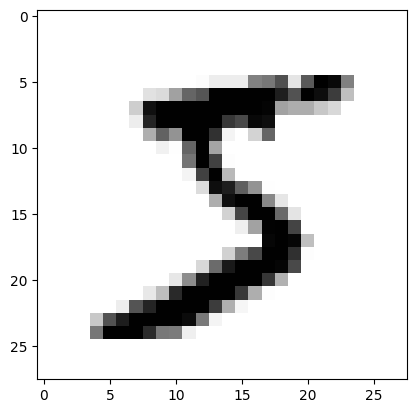

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray_r')  # 5  ka pooled image 


In [21]:
y_train[0]  #label -->output value



5

In [22]:
from tensorflow.keras import utils
utils.to_categorical


<function keras.src.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [24]:
y_cat_test=utils.to_categorical(y_test,10)  # hr no ke corresdng kaafi images hongi all images ko numbers me catergorival krdo 
y_cat_train=utils.to_categorical(y_train,10)


In [25]:
single_image.max()

255

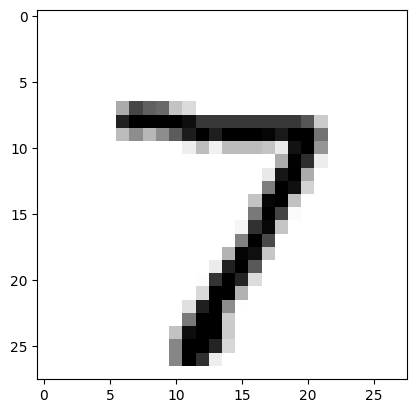

In [28]:
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()  #colour ko 1 or 0 me encode 
scaled_image=x_test[0]
plt.imshow(scaled_image,cmap='gray_r')

In [29]:
#now inclde the colour channels too 
x_train=x_train.reshape(60000,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [30]:
x_test=x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten


In [33]:
model=Sequential()

#conv layer 1
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu')) #shape upar se 

#pooling layer --to reduce feature map 
model.add(MaxPool2D(pool_size=(2,2)))  #play around by expermentaing 

model.add(Flatten())  #1 d image resutant -->jo last layer interpret karega 

model.add(Dense(128,activation='relu')) #1 2 8 for mnst data 

#can't play out here 
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001C48DFE4730>>

In [34]:
#now train the model      output ko catergoruse kiya tha 
model.fit(x_train,y_cat_train,epochs=2) #we will run on ntore daa twice 


Epoch 1/2
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1433 - accuracy: 0.9567
Epoch 2/2
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0481 - accuracy: 0.9858


In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
model.evaluate(x_test,y_cat_test) #98% accurarte 

313/313 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9871


[0.0374014787375927, 0.9871000051498413]

In [40]:
from sklearn.metrics import classification_report
#predictions=model.predict_classes(x_test)
predictions = model.predict(x_test)  #no more seroius error in this -->can be ignored too


print(classification_report(y_test,predictions))


313/313 [==============================] - 2s 5ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets